[![Binder](https://mybinder.org/badge_logo.svg)](https://github.com/Sistemas-Multimedia/MRVC/blob/master/src/image_IPP.ipynb)

# RD performance in IPP video coding
This notebook runs two different IPP... experiments.

The first one, implemented in `image_IPP.py` is a simple IPP... video codec without RDO (all macro-blocks are motion compensated as P-type blocks). The lossy image compressor is MP4 used in intra mode.

`image_IPP_adaptive.py`

The second one, implemented in `image_IPP_quantized_residue.py` is a modification of `image_IPP.py` where the prediction-error images are quantized before they are compressed with MP4. Each macro-block is quantized to contribute with the same slope to the reconstructed macro-block. 

Finally, the RD curves are compared to MP4 (intra-mode).

In [1]:
!ln -sf ~/quantization/deadzone_quantizer.py .
!ln -sf ~/quantization/distortion.py .
!ln -sf ~/quantization/information.py .
!ln -sf ~/quantization/midtread_quantizer.py .

### Sequence to compress

In [2]:
#sequence = "bus"
sequence = "akiyo"

!../sequences/$sequence/runme.sh

### Number of frames to compress

In [3]:
N_frames = 5 # Min val 3

## Testing `image_IPP`

### Select `image_IPP` in `RD_curve.py`

In [4]:
!sed -z -i 's/\n#import image_IPP as codec\n/\nimport image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [5]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	import image_IPP as codec
    13	#import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	#import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


### We use MP4 and therefore, no previous spatial transform is used
MP4 uses the DCT.

In [6]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [7]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


### Select the color transform

In [8]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [9]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


### Run the codec

In [10]:
!rm /tmp/*.png
!../sequences/$sequence/runme.sh

akiyo_cif.y4m exists.
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --e

In [11]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:215 I_codec()] image_IPP.I_codec: max=255 min=0 type=uint8
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.3039856255054474 -0.3060067296028137
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 21
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 130 -126 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=216 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 62 -51 int16
[image_IPP.py:74 encode()] W_k 32 -51
[image_IPP.py:76 encode()] COMPUTED flow 0.2751498222351074 -0.40262964367866516
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 21
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 112 -88 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=227 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 64 -63 i

[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 99 -106 int16
[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:197 compute_br()] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:215 I_codec()] image_IPP.I_codec: max=255 min=0 type=uint8
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.3039856255054474 -0.3060067296028137
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 33
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 130 -120 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=255 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 105 -67 int16
[image_IPP.py:74 encode()] W_k 32 -51
[image_IPP.py:76 encode()] COMPUTED flow 0.2751498222351074 -0.40262964367866516
[image_IPP.py:79 encode()

In [12]:
!grep BPP /tmp/output_image_IPP | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP.txt

In [13]:
!cat /tmp/image_IPP.txt

0.19010416666666666	39.189119055134675
0.16440972222222222	46.16638126052189
0.14759574915824916	54.075230166245795
0.13663194444444443	65.95326309974747
0.12763047138047137	80.66698955702861
0.12288510101010101	106.01292679398148
0.11894991582491582	144.31065801241584


In [14]:
RD_image_IPP = []
with open("/tmp/image_IPP.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP.append((float(rate), float(_distortion)))

## Testing `image_IPP_adaptive.py`

### Select `image_IPP_adaptive` in `RD_curve.py`

In [15]:
!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [16]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	#import image_IPP as codec
    13	import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	#import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


In [17]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [18]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [19]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [20]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [21]:
!rm /tmp/*.png
!../sequences/$sequence/runme.sh

akiyo_cif.y4m exists.
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --e

In [22]:
# You can see in real-time the output by running "tail -f /tmp/output"
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_adaptive >&1) | grep BPP | grep Average | cat -n

[image_IPP.py:215 I_codec()] image_IPP.I_codec: max=255 min=0 type=uint8
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.3039856255054474 -0.3060067296028137
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 21
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 130 -126 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=216 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 62 -51 int16
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 21
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 126 -68 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=189 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 56 -30 int16
[image_IPP.py:74 encode()] W_k 32 -51
[image_IPP.py:76 encode()] COMPUTED flow 0.2751498222351074 -0.40262964367866516
[image_IPP.py:79 encode()] USED flow

[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 36 -40 int16
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.24498766660690308 -0.2870006859302521
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 27
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 127 -112 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=249 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 62 -43 int16
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 27
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 114 -58 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=249 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 97 -28 int16
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.38818204402923584 -0.8962958455085754
[image_IPP.py:79 encode()

[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 121 -128 int16
[image_IPP.py:158 compute_br()] cat /tmp/original_motion_y_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:197 compute_br()] cat /tmp/original_motion_x_diff_comp_???.png | gzip -9 > /tmp/image_IPP_motion_y.gz
[image_IPP.py:215 I_codec()] image_IPP.I_codec: max=255 min=0 type=uint8
[image_IPP.py:74 encode()] W_k 32 -50
[image_IPP.py:76 encode()] COMPUTED flow 0.3039856255054474 -0.3060067296028137
[image_IPP.py:79 encode()] USED flow 0 0
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 36
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 129 -128 int16
[image_IPP.py:241 E_codec_4_YCoCg()] image_IPP.E_codec: max=255 min=0 type=uint8
[image_IPP.py:253 E_codec_4_YCoCg()] image_IPP.E_codec: deQ error YUV 75 -86 int16
[image_IPP.py:238 E_codec_4_YCoCg()] image_IPP.E_codec: q_step 36
[image_IPP.py:239 E_codec_4_YCoCg()] image_IPP.E_codec: error 174 -188 int16
[

In [23]:
!grep BPP /tmp/output_image_IPP_adaptive | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_adaptive.txt

In [24]:
!cat /tmp/image_IPP_adaptive.txt

0.13982007575757577	69.27331255260943
0.1329229797979798	70.8156657723064
0.13026094276094277	70.39113136574073
0.12966119528619527	78.9665200178872
0.12895096801346803	86.27241884995792
0.12652041245791246	115.07429766414143
0.12432659932659933	159.01078559027775


In [25]:
RD_image_IPP_adaptive = []
with open("/tmp/image_IPP_adaptive.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_adaptive.append((float(rate), float(_distortion)))

## Testing MP4

### Select `MP4` in `RD_curve.py`

In [26]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import MP4 as codec\n/\nimport MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_quantized_residue as codec\n/\n#import image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [27]:
!grep import RD_curve.py

#import debug
import config
import distortion
import image_3 as frame
#import image_interpolated_IPP as codec
#import image_IPP as codec
#import image_IPP_adaptive as codec
#import image_IPP_quantized_prediction as codec
#import image_IPP_quantized_residue as codec
import MP4 as codec
#import IPP_compressor as codec
import logging
import argparse


In [28]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [29]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [30]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [31]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [32]:
!rm /tmp/*.png
!../sequences/$sequence/runme.sh

akiyo_cif.y4m exists.
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --e

In [33]:
!python RD_curve.py --N_frames=$N_frames 1> >(tee /tmp/output_MP4 >&1) | grep BPP | grep Average | cat -n

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable

frame=    5 fps=0.0 q=-1.0 Lsize=       4kB time=00:00:00.16 bitrate= 210.2kbits/s speed=9.71x    
video:3kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 26.602468%
[libx264 @ 0x55bc57d91240] frame I:1     Avg QP:34.53  size:  2554
[libx264 @ 0x55bc57d91240] frame P:4     Avg QP:37.59  size:    36
[libx264 @ 0x55bc57d91240] mb I  I16..4: 29.5% 56.3% 14.1%
[libx264 @ 0x55bc57d91240] mb P  I16..4:  0.0%  0.0%  0.0%  P16..4:  1.6%  0.6%  0.1%  0.0%  0.0%    skip:97.7%
[libx264 @ 0x55bc57d91240] 8x8 transform intra:56.3% inter:80.0%
[libx264 @ 0x55bc57d91240] coded y,u,v intra: 33.6% 13.1% 9.3% inter: 0.1% 0.0% 0.0%
[libx264 @ 0x55bc57d91240] i16 v,h,dc,p: 38% 40% 11% 10%
[libx264 @ 0x55bc57d91240] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 31% 21% 18%  5%  3%  7%  4%  6%  5%
[libx264 @ 0x55bc57d91240] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 38% 20%  9%  6%  4%  6%  5%  7%  5%
[libx264 @ 0x55bc57d91240] Weighted P-Frames: Y:0.0% UV:0.0%
[libx264 @ 0x55bc57d91240] ref P L0: 94.4%

ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable

Output #0, image2, to '/tmp/original_reconstructed_%03d.png':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf58.76.100
  Stream #0:0(und): Video: png, rgb24(pc, progressive), 352x288 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 25 fps, 25 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
      encoder         : Lavc58.134.100 png
frame=    5 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.20 bitrate=N/A speed= 9.8x    
video:462kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
     1	Q_step: 21 BPP: 0.0526199494949495 KBPS: 480.096 Average AMSE: 10.227355587121213
     2	Q_step: 24 BPP: 0.04041982323232323 KBPS: 368.784 Average AMSE: 14.271014178240742
     3	Q_step: 27 BPP: 0.03232323232323232 KBPS: 294.912 Average AMSE: 20.01470367739899
     4	Q_step: 30 BPP: 0.026557239057239057 KBPS: 242.304 Average AMSE: 28.01847380

In [34]:
!grep BPP /tmp/output_MP4 | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/MP4.txt

In [35]:
!cat /tmp/MP4.txt

0.0526199494949495	10.227355587121213
0.04041982323232323	14.271014178240742
0.03232323232323232	20.01470367739899
0.026557239057239057	28.018473800505053
0.022132786195286195	40.35029263994108
0.01875	58.18308606902357
0.016303661616161615	83.56751367845118


In [36]:
RD_MP4 = []
with open("/tmp/MP4.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_MP4.append((float(rate), float(_distortion)))

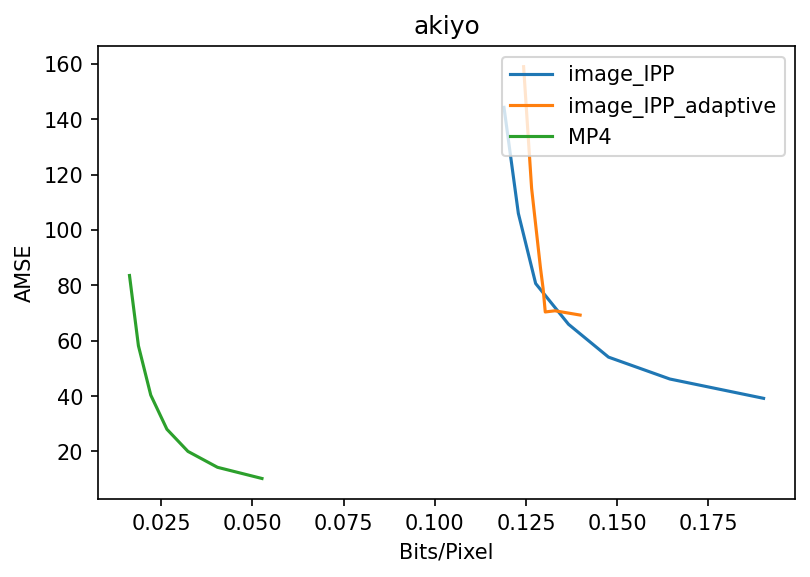

In [37]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
#pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

## Ignore the rest

## Testing `image_IPP_quantized_residue`

### Select `image_IPP_quantized_residue` in `RD_curve.py`

In [38]:
!sed -z -i 's/\nimport image_IPP as codec\n/\n#import image_IPP as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport image_IPP_adaptive as codec\n/\n#import image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py
!sed -z -i 's/\nimage_IPP_quantized_prediction as codec\n/\n#import image_IPP_quantized_prediction as codec\n/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_quantized_residue as codec\n/\nimport image_IPP_quantized_residue as codec\n/g' RD_curve.py

In [39]:
!cat -n RD_curve.py | grep "import" 

     5	#import debug
     6	import config
     7	import distortion
     8	import image_3 as frame
    11	#import image_interpolated_IPP as codec
    12	#import image_IPP as codec
    13	#import image_IPP_adaptive as codec
    14	#import image_IPP_quantized_prediction as codec
    15	import image_IPP_quantized_residue as codec
    16	#import MP4 as codec
    17	#import IPP_compressor as codec
    19	import logging
    28	import argparse


In [40]:
!sed -z -i 's/\ntransform = "DWT"\n/\n#transform = "DWT"\n/g' config.py
!sed -z -i 's/\ntransform = "LP"\n/\n#transform = "LP"\n/g' config.py
!sed -z -i 's/\n#transform = None\n/\ntransform = None\n/g' config.py

In [41]:
!cat -n config.py | grep "transform" 

     3	#multiresolution_transform = "DWT"
     4	#multiresolution_transform = "LP"
     5	multiresolution_transform = None


In [42]:
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\ncolor = "YCoCg\n/\n#color = "YCoCg\n/g' config.py
!sed -z -i 's/\n#color = "YCoCg\n/\ncolor = "YCoCg\n/g' config.py

In [43]:
!cat -n config.py | grep "color" 

    10	color = "YCoCg"
    11	#color = "YCrCb"
    12	#color = "RGB"


In [ ]:
# You can see in real-time the output by running "tail -f /tmp/output"
!rm /tmp/*.png
!../sequences/$sequence/runme.sh
!python RD_curve.py --first_frame=0 --N_frames=$N_frames 1> >(tee /tmp/output_image_IPP_quantized_residue >&1) | grep BPP | grep Average | cat -n

akiyo_cif.y4m exists.
ffmpeg version 4.4-6ubuntu5 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-7ubuntu1)
  configuration: --prefix=/usr --extra-version=6ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --e

In [ ]:
!grep BPP /tmp/output_image_IPP_quantized_residue | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/image_IPP_quantized_residue.txt

In [ ]:
!cat /tmp/image_IPP_quantized_residue.txt

In [ ]:
RD_image_IPP_QR = []
with open("/tmp/image_IPP_quantized_residue.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_image_IPP_QR.append((float(rate), float(_distortion)))

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_image_IPP), label="image_IPP")
pylab.plot(*zip(*RD_image_IPP_adaptive), label="image_IPP_adaptive")
#pylab.plot(*zip(*RD_image_IPP_QR), label="image_IPP_quantized_residue")
pylab.plot(*zip(*RD_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points_no_intrablocks), label="No Intra-blocks")
pylab.plot(*zip(*RD_points_with_intrablocks), label="With Intra-blocks")
pylab.plot(*zip(*RD_points_MP4), label="MP4")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()